In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

### <span style='color:green'> **[done]** </span>Loading stat_model trained data:

In [2]:
loc = '../data/'
file = 'data_stats_prediction_set.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001919,-0.102865,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001919,-0.213350,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001919,0.265418,0.415429,-0.000407,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,0.011599,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN


#### <span style='color:green'> **[done]** </span>Filter by weight_class:

In [3]:
weight = "Bantamweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = df[df['weight_class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
496,lose,Antonio Banuelos,Miguel Torres,2011-02-05,Bantamweight,U-DEC,Unanimous,-0.001919,-2.312564,0.022810,-0.000407,0.917677,2.385579,-1.2,-0.794221,-0.806445,0.813114,-1.382692,0.011599,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN
497,win,Demetrious Johnson,Norifumi Yamamoto,2011-02-05,Bantamweight,U-DEC,Unanimous,-0.001919,0.817843,3.948999,-0.000407,1.657445,0.687986,0.5,0.860551,0.761925,-0.223955,0.876319,-1.881571,0.007339,0.002734,0.00823,True,False,NaN,NaN,NaN,NaN
498,win,Nick Pace,Will Campuzano,2010-12-04,Bantamweight,SUB,Pace/Pillory Choke,-0.001919,0.081276,2.378523,0.857591,0.928885,0.202960,0.3,-0.580296,0.266650,-0.432634,0.007469,0.011599,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN


#### <span style='color:green'> **[done]** </span>Define X & Y:

In [4]:
req_data = ['date','weight_class','fighter','opponent','method','outlier','lof_outlier']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif'
    ]

df = df[req_data + X + y]
df.tail(3)

,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
496,2011-02-05,Bantamweight,Antonio Banuelos,Miguel Torres,U-DEC,False,False,-0.001919,-2.312564,0.022810,-0.000407,0.917677,2.385579,-1.2,-0.794221,-0.806445,0.813114,-1.382692,0.011599,0.007339,0.002734,0.00823,lose
497,2011-02-05,Bantamweight,Demetrious Johnson,Norifumi Yamamoto,U-DEC,True,False,-0.001919,0.817843,3.948999,-0.000407,1.657445,0.687986,0.5,0.860551,0.761925,-0.223955,0.876319,-1.881571,0.007339,0.002734,0.00823,win
498,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,-0.001919,0.081276,2.378523,0.857591,0.928885,0.202960,0.3,-0.580296,0.266650,-0.432634,0.007469,0.011599,0.007339,0.002734,0.00823,win


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [5]:
df = df[(df.outlier == False)&(df.lof_outlier == False)].reset_index(drop=True)
df.tail(3)

,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
431,2011-03-03,Bantamweight,Takeya Mizugaki,Reuben Duran,S-DEC,False,False,-0.001919,-0.876260,1.593286,-0.000407,0.278786,1.554105,-0.6,0.130690,-0.971537,0.414727,0.615664,0.011599,0.007339,0.002734,0.00823,win
432,2011-02-05,Bantamweight,Antonio Banuelos,Miguel Torres,U-DEC,False,False,-0.001919,-2.312564,0.022810,-0.000407,0.917677,2.385579,-1.2,-0.794221,-0.806445,0.813114,-1.382692,0.011599,0.007339,0.002734,0.00823,lose
433,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,-0.001919,0.081276,2.378523,0.857591,0.928885,0.202960,0.3,-0.580296,0.266650,-0.432634,0.007469,0.011599,0.007339,0.002734,0.00823,win


#### <span style='color:green'> **[done]** </span>Data status:

In [6]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.2)
df.tail(3)

Data split: Data=(434, 24), train_set=(260, 15), validation_set=(54, 15), test_set=(120, 15)


,set,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
431,train,2011-03-03,Bantamweight,Takeya Mizugaki,Reuben Duran,S-DEC,False,False,-0.001919,-0.876260,1.593286,-0.000407,0.278786,1.554105,-0.6,0.130690,-0.971537,0.414727,0.615664,0.011599,0.007339,0.002734,0.00823,win
432,train,2011-02-05,Bantamweight,Antonio Banuelos,Miguel Torres,U-DEC,False,False,-0.001919,-2.312564,0.022810,-0.000407,0.917677,2.385579,-1.2,-0.794221,-0.806445,0.813114,-1.382692,0.011599,0.007339,0.002734,0.00823,lose
433,test,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,-0.001919,0.081276,2.378523,0.857591,0.928885,0.202960,0.3,-0.580296,0.266650,-0.432634,0.007469,0.011599,0.007339,0.002734,0.00823,win


In [7]:
print('Train records: %d' %len(df[df.set=='train']))
print('Train records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'train')])))
print('Train records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'train')])))
print('-----------------------------------')
print('Validation records: %d' %len(df[df.set=='validation']))
print('Validation records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'validation')])))
print('Validation records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'validation')])))
print('-----------------------------------')
print('Test records: %d' %len(df[df.set=='test']))
print('Test records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'test')])))
print('Test records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'test')])))

Train records: 260
Train records of df.result==win : 135
Train records of df.result==lose : 125
-----------------------------------
Validation records: 54
Validation records of df.result==win : 26
Validation records of df.result==lose : 28
-----------------------------------
Test records: 120
Test records of df.result==win : 69
Test records of df.result==lose : 51


## <span style='color:green'> **[done]** </span> Logistic regression model training:

In [8]:
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=1, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
df.tail(3)

,set,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
431,train,2011-03-03,Bantamweight,Takeya Mizugaki,Reuben Duran,S-DEC,False,False,-0.001919,-0.876260,1.593286,-0.000407,0.278786,1.554105,-0.6,0.130690,-0.971537,0.414727,0.615664,0.011599,0.007339,0.002734,0.00823,win,lose
432,train,2011-02-05,Bantamweight,Antonio Banuelos,Miguel Torres,U-DEC,False,False,-0.001919,-2.312564,0.022810,-0.000407,0.917677,2.385579,-1.2,-0.794221,-0.806445,0.813114,-1.382692,0.011599,0.007339,0.002734,0.00823,lose,lose
433,test,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,-0.001919,0.081276,2.378523,0.857591,0.928885,0.202960,0.3,-0.580296,0.266650,-0.432634,0.007469,0.011599,0.007339,0.002734,0.00823,win,win


Initial model accuracy: 0.8500


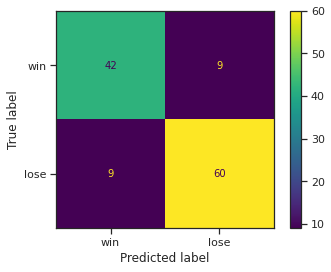

In [9]:
set_label = 'test'
cm =  confusion_matrix(y_true=df.result[df.set==set_label], y_pred=df.result_pred[df.set==set_label])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Initial model accuracy: %.4f' %get_accuracy(act=df.result[df.set==set_label], pred=df.result_pred[df.set==set_label]))
disp.plot()

### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [10]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']
test_index = df.index[df.set=='test']

grid = {'C':[],
       'train_accuracy':[],
       'valid_accuracy':[],
       'test_accuracy':[]
       }

for c in tqdm([0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1]):
    grid['C'].append(c)
    logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=c, solver='lbfgs')
    df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
    grid['train_accuracy'].append(get_mean_accuracy(act=df.loc[train_index,'result'], pred=df.loc[train_index,'result_pred']))
    grid['valid_accuracy'].append(get_mean_accuracy(act=df.loc[valid_index,'result'], pred=df.loc[valid_index,'result_pred']))
    grid['test_accuracy'].append(get_mean_accuracy(act=df.loc[test_index,'result'], pred=df.loc[test_index,'result_pred']))
    
grid = grid = pd.DataFrame(data=grid)
grid

100%|██████████| 9/9 [00:00<00:00, 124.72it/s]


,C,train_accuracy,valid_accuracy,test_accuracy
0,0.010,0.861538,0.833333,0.875000
1,0.025,0.884615,0.814815,0.866667
2,0.050,0.884615,0.814815,0.866667
3,0.075,0.888462,0.833333,0.841667
4,0.100,0.888462,0.833333,0.841667
5,0.250,0.888462,0.833333,0.841667
6,0.500,0.892308,0.833333,0.850000
7,0.750,0.892308,0.833333,0.850000
8,1.000,0.884615,0.833333,0.850000


Text(0, 0.5, 'Accuracy')

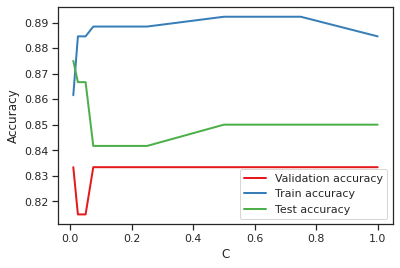

In [11]:
sns.lineplot( data=grid, x='C', y='valid_accuracy', label='Validation accuracy')
#sns.scatterplot( data=grid, x='C', y='valid_accuracy')
sns.lineplot( data=grid, x='C', y='train_accuracy', label='Train accuracy')
#sns.scatterplot( data=grid, x='C', y='train_accuracy')
sns.lineplot( data=grid, x='C', y='test_accuracy', label='Test accuracy')
#sns.scatterplot( data=grid, x='C', y='test_accuracy')
plt.ylabel("Accuracy")

In [12]:
best_model_param = grid.sort_values(by=['valid_accuracy'], ascending=False).reset_index(drop=True)
best_c = best_model_param.iloc[0]['C']
best_model_param.iloc[0]

C                 0.010000
train_accuracy    0.861538
valid_accuracy    0.833333
test_accuracy     0.875000
Name: 0, dtype: float64

Post Parameters Tuning accuracy: 0.8750


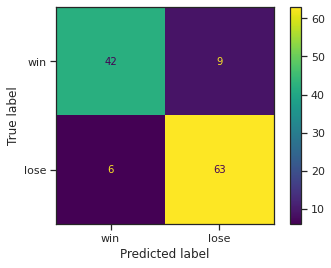

In [13]:
logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=best_c, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)

set_label = 'test'
cm =  confusion_matrix(y_true=df.result[df.set==set_label], y_pred=df.result_pred[df.set==set_label])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Post Parameters Tuning accuracy: %.4f' %get_accuracy(act=df.result[df.set==set_label], pred=df.result_pred[df.set==set_label]))
disp.plot()

#### <span style='color:green'> **[done]** </span> Add predictions to data:

In [14]:
pred_columns = ['result_pred']
pred = df[['date','fighter','opponent'] + pred_columns]
pred.tail(3)

,date,fighter,opponent,result_pred
431,2011-03-03,Takeya Mizugaki,Reuben Duran,win
432,2011-02-05,Antonio Banuelos,Miguel Torres,lose
433,2010-12-04,Nick Pace,Will Campuzano,win


In [15]:
data = pd.read_csv('../data/data_features_outliers_detected.csv')
data = pd.merge(data,pred, on=['date','fighter','opponent'], how='outer')

data.to_csv('../data/data_result_prediction_set.csv', index=None)
print('../data/data_result_prediction_set.csv saved.')
print('result_pred: %s' %data.result_pred.unique())
data.head(3)

../data/data_result_prediction_set.csv saved.
result_pred: [nan 'win' 'lose']


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,result_pred
0,win,Max Holloway,Arnold Allen,2023-04-15,Featherweight,U-DEC,Unanimous,-0.001919,2.622430,0.02281,-0.000407,-0.460982,0.272249,0.0,2.420944,0.596833,1.217824,-0.166302,-1.881571,-0.660964,-5.568664,1.027652,True,True,NaN
1,win,Edson Barboza,Billy Quarantillo,2023-04-15,Featherweight,KO/TKO,Knee,1.344808,0.081276,0.02281,-0.000407,-0.623507,0.584052,-1.1,-2.411241,-1.136628,-1.058670,1.571399,0.011599,-0.289684,-0.554406,2.047075,False,False,NaN
2,lose,Dustin Jacoby,Azamat Murzakanov,2023-04-15,Light Heavyweight,U-DEC,Unanimous,-1.348646,-0.102865,0.02281,-0.000407,-0.186371,-0.801738,0.0,0.564831,-0.806445,0.572817,0.094354,-1.881571,-0.487700,-0.554406,1.027652,False,False,NaN


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [16]:
save_trained_model(model=logistic_reg_clf,filename_path='../global_variables/result_pred_' + set_lower_cases(weight) + '_logistic_reg.pkl')

../global_variables/result_pred_bantamweight_logistic_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> saving data:

In [17]:
try:
    df.to_csv('../data/data_result_prediction_set.csv',index=None)
    print('../data/data_result_prediction_set.csv saved.')
except:
    print('error occurs saving ../data/data_result_prediction_set.csv - might be file in use.')

../data/data_result_prediction_set.csv saved.
